In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive"

 12.xlsx
 19001010705401.pdf
 19001010705402.pdf
 19001010705403.pdf
 19001010705404.pdf
 19001010705405.pdf
 19001010705406.pdf
 190010107054_Assignment.pdf
'190010107054_CompletionCertificate (1).pdf'
 190010107054_CompletionCertificate.pdf
 190010107054_ETC_s2.pdf
 190010107054_Lab-1.pdf
 190010107054-LAB1.pdf
 190010107054_lab-2.pdf
 190010107054_lab-3.pdf
 190010107054_lab-4.pdf
 190010107054_lab-5.pdf
 190010107054_lab-6.pdf
'190010107054 Shubham egd-mid-2.pdf'
 190010107054_task2.html
 19cp54_DS-ass-1.docx
 19cp54_DS-ass-2.docx
 19CP54_ETC-2.docx
 19cp54_ETC-3.docx
 19cp54-ETC-4.docx
 19cp54_shubham_DF_1.pdf
 19cp54_shubham_DF_2.pdf
 2-01.jpg
 20200114183650_IMG_0619.JPG.jpg
 4_E_Feature_Impact.pdf
 5_E_Global_Agnostic.pdf
 6_E_Local_Agnostic_2023_02_21.pdf
 7590_Letter_Writing_Book.pdf
'Aayush Vataliya.jpg'
'Abhishek Pandey.jpg'
'About ADIT and Programme Offered.docx'
'Abraham Kakooza.jpg'
'Achini Apeksha.jpg'
'ADIT BOYS HOSTEL Consent Form.docx'
'Akanksha Singh.jpg'
'Alma Mate

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

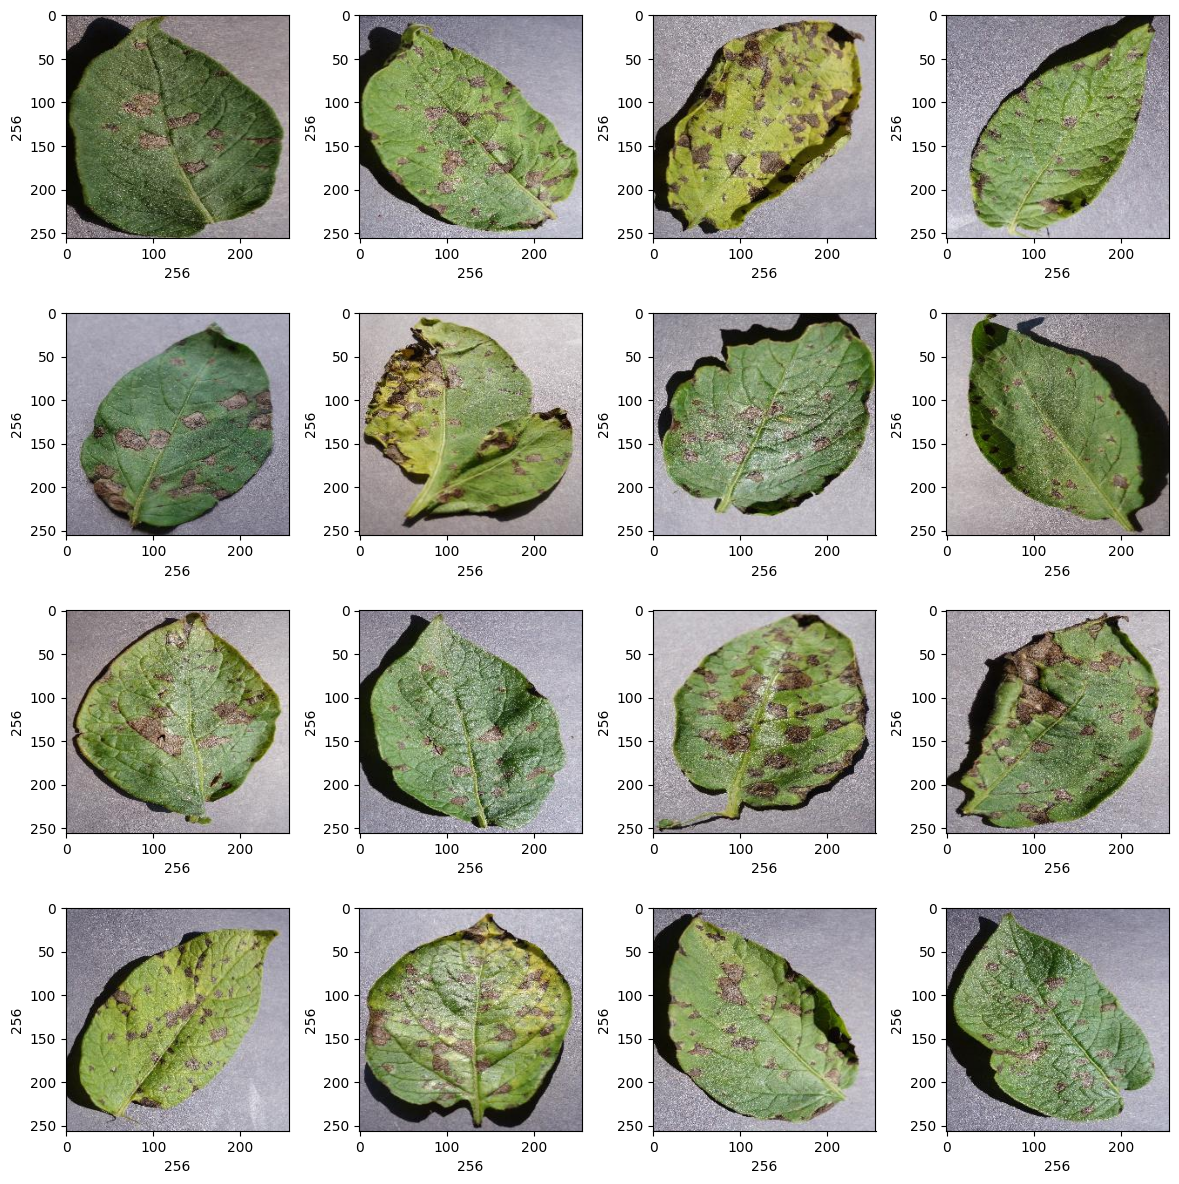

In [4]:
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/plant diseases/Collab Code/Data/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [5]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [6]:
dir = "/content/drive/My Drive/plant diseases/Collab Code/Data/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [7]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

,count
0,
0,300
1,300
2,300


In [8]:
image_list[0].shape

(256, 256, 3)

In [9]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [11]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 85, 85, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 42, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │         225,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [16]:
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.3686 - loss: 1.0623 - val_accuracy: 0.6458 - val_loss: 0.9244
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 38s 7s/step - accuracy: 0.6206 - loss: 0.9176 - val_accuracy: 0.6667 - val_loss: 0.7786
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.6385 - loss: 0.7816 - val_accuracy: 0.6875 - val_loss: 0.6701
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.6502 - loss: 0.6615 - val_accuracy: 0.7153 - val_loss: 0.6027
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.7439 - loss: 0.5561 - val_accuracy: 0.7292 - val_loss: 0.5042
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.7233 - loss: 0.4771 - val_accuracy: 0.9236 - val_loss: 0.4477
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.9453 - loss: 0.4257 - val_accuracy: 0.9653 - val_loss: 0.3989
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 8s/step - accuracy: 0.9216 - loss: 0.3671 - val_accuracy: 0.9028 - val_loss: 0.3471
Epoch 9/

In [21]:
model.save("/content/drive/My Drive/plant diseases/Collab Code/Data/.plant_disease.h5")

json_model = model.to_json()

with open('/content/drive/My Drive/plant diseases/Collab Code/Data/plant_model.json', 'w') as json_file:
    json_file.write(json_model)

model.save("/content/drive/My Drive/plant diseases/Collab Code/Data/plant_model_weights.h5")

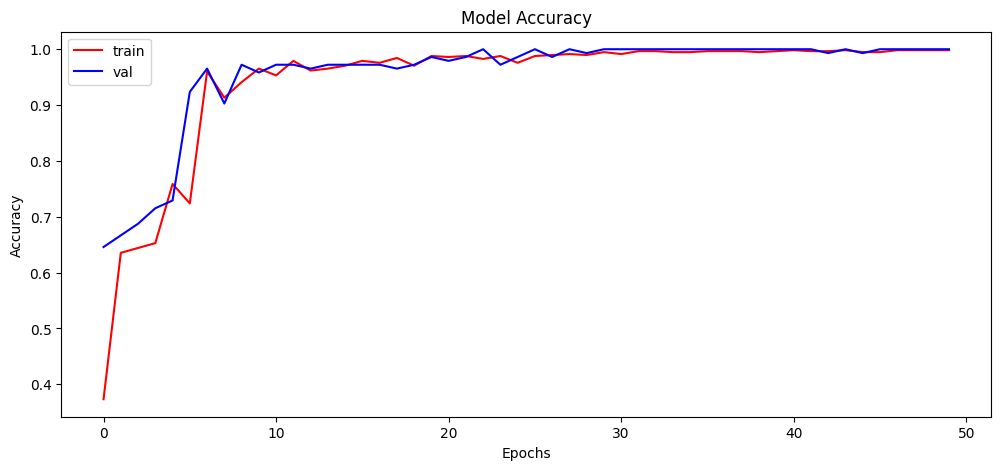

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [23]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 575ms/step - accuracy: 0.9924 - loss: 0.0254
Test Accuracy: 98.88888597488403


In [24]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 492ms/step


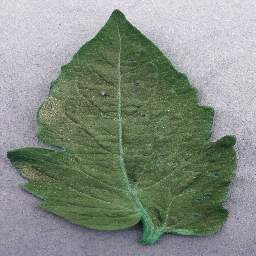

In [25]:
img = array_to_img(x_test[10])
img

In [26]:
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight
